In [25]:
#!pip3 install shap

In [3]:
# !pip3 install pycaret

In [2]:
import AutoClassification as AR
import pandas as pd

ModuleNotFoundError: No module named 'pycaret'

In [20]:
data = pd.read_csv('./Ford_data.csv')

In [21]:
data

,Unnamed: 0,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor491,sensor492,sensor493,sensor494,sensor495,sensor496,sensor497,sensor498,sensor499,label
0,0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1.0
1,1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1.0
2,2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1.0
3,3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1.0
4,4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,4916,0.143630,-0.135823,-0.510278,-0.850804,-1.058080,-1.082756,-0.961845,-0.748399,-0.575669,...,0.865397,1.366315,1.896845,2.229968,2.192954,1.761128,0.939424,-0.096588,-1.076587,-1.0
4917,4917,-0.165568,-0.504614,-0.780065,-0.937044,-0.950518,-0.854054,-0.701736,-0.544270,-0.424473,...,-1.916656,-1.774917,-1.439674,-0.935756,-0.298758,0.406564,1.100995,1.722323,2.191682,1.0
4918,4918,0.710084,0.593979,0.381886,0.127285,-0.112304,-0.274140,-0.312698,-0.195008,0.063567,...,0.272573,-0.040822,-0.235795,-0.304746,-0.270086,-0.192379,-0.126553,-0.117822,-0.189094,1.0
4919,4919,0.006847,-0.140624,-0.270594,-0.378835,-0.461983,-0.515125,-0.538119,-0.532769,-0.495602,...,0.176298,-0.031868,-0.262996,-0.492936,-0.698291,-0.870596,-1.000708,-1.084108,-1.109963,1.0


In [8]:
data.isnull().sum()

Unnamed: 0    0
sensor0       0
sensor1       0
sensor2       0
sensor3       0
             ..
sensor496     0
sensor497     0
sensor498     0
sensor499     0
label         0
Length: 502, dtype: int64

## Modeling

In [22]:
setting = AR.setup(data, 'label', True, True)

NameError: name 'pycaret' is not defined

In [4]:
setting_result = AR.save_df()
setting_result

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(4921, 502)"
5,Transformed data shape,"(4748, 502)"
6,Transformed train set shape,"(3271, 502)"
7,Transformed test set shape,"(1477, 502)"
8,Numeric features,501
9,Preprocess,True


In [5]:
setting.y_train

4785    1.0
2852   -1.0
2658   -1.0
738    -1.0
163    -1.0
       ... 
3294    1.0
346     1.0
4265   -1.0
1475   -1.0
2612    1.0
Name: label, Length: 3444, dtype: float32

In [6]:
metrics = setting.get_metrics()
metrics['Name']

ID
acc           Accuracy
auc                AUC
recall          Recall
precision    Precision
f1                  F1
kappa            Kappa
mcc                MCC
Name: Name, dtype: object

In [7]:
setting.models()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
single_model = AR.single('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5507,0.5689,0.5655,0.5367,0.5507,0.1021,0.1022
1,0.5275,0.5603,0.4762,0.5161,0.4954,0.0526,0.0527
2,0.5623,0.5712,0.4524,0.5630,0.5017,0.1196,0.1219
3,0.5449,0.5457,0.5417,0.5322,0.5369,0.0896,0.0897
4,0.5262,0.5222,0.5595,0.5137,0.5356,0.0537,0.0539
5,0.5203,0.5377,0.5329,0.5057,0.5190,0.0413,0.0414
6,0.4680,0.4924,0.3952,0.4459,0.4190,-0.0683,-0.0687
7,0.5203,0.5195,0.5569,0.5054,0.5299,0.0426,0.0428
8,0.5029,0.4953,0.5090,0.4885,0.4985,0.0061,0.0062


In [11]:
single_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
single_result = AR.save_df()
single_result

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5507,0.5689,0.5655,0.5367,0.5507,0.1021,0.1022
1,0.5275,0.5603,0.4762,0.5161,0.4954,0.0526,0.0527
2,0.5623,0.5712,0.4524,0.5630,0.5017,0.1196,0.1219
3,0.5449,0.5457,0.5417,0.5322,0.5369,0.0896,0.0897
4,0.5262,0.5222,0.5595,0.5137,0.5356,0.0537,0.0539
5,0.5203,0.5377,0.5329,0.5057,0.5190,0.0413,0.0414
6,0.4680,0.4924,0.3952,0.4459,0.4190,-0.0683,-0.0687
7,0.5203,0.5195,0.5569,0.5054,0.5299,0.0426,0.0428
8,0.5029,0.4953,0.5090,0.4885,0.4985,0.0061,0.0062


<Axes: xlabel='Fold'>

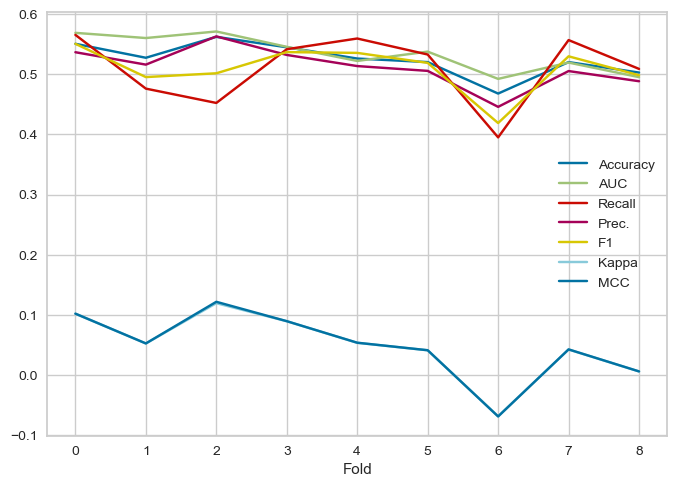

In [13]:
single_visual_result = AR.single_visual(single_result)
single_visual_result

## Model Comparing

In [9]:
best_model = AR.compare('Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8441,0.9062,0.7481,0.9164,0.8233,0.6864,0.6982,0.3020
lightgbm,Light Gradient Boosting Machine,0.7790,0.8575,0.7851,0.7665,0.7753,0.5580,0.5587,0.2060
et,Extra Trees Classifier,0.7587,0.8308,0.7253,0.7662,0.7450,0.5163,0.5173,0.2720
rf,Random Forest Classifier,0.7306,0.8057,0.7075,0.7306,0.7183,0.4602,0.4610,0.2670
gbc,Gradient Boosting Classifier,0.6327,0.6724,0.5946,0.6301,0.6112,0.2637,0.2646,0.2240
dt,Decision Tree Classifier,0.5775,0.5774,0.5725,0.5648,0.5683,0.1547,0.1549,0.1890
knn,K Neighbors Classifier,0.5299,0.5396,0.5122,0.5174,0.5136,0.0589,0.0591,0.2410
lda,Linear Discriminant Analysis,0.5166,0.4940,0.6114,0.5028,0.5514,0.0379,0.0387,0.2910
dummy,Dummy Classifier,0.5136,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1810
ada,Ada Boost Classifier,0.5102,0.5094,0.4674,0.4957,0.4808,0.0180,0.0180,0.2250


In [9]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [10]:
compare_matrix = AR.save_df()
compare_matrix

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8441,0.9062,0.7481,0.9164,0.8233,0.6864,0.6982,0.302
lightgbm,Light Gradient Boosting Machine,0.7790,0.8575,0.7851,0.7665,0.7753,0.5580,0.5587,0.206
et,Extra Trees Classifier,0.7587,0.8308,0.7253,0.7662,0.7450,0.5163,0.5173,0.272
rf,Random Forest Classifier,0.7306,0.8057,0.7075,0.7306,0.7183,0.4602,0.4610,0.267
gbc,Gradient Boosting Classifier,0.6327,0.6724,0.5946,0.6301,0.6112,0.2637,0.2646,0.224
dt,Decision Tree Classifier,0.5775,0.5774,0.5725,0.5648,0.5683,0.1547,0.1549,0.189
knn,K Neighbors Classifier,0.5299,0.5396,0.5122,0.5174,0.5136,0.0589,0.0591,0.241
lda,Linear Discriminant Analysis,0.5166,0.4940,0.6114,0.5028,0.5514,0.0379,0.0387,0.291
dummy,Dummy Classifier,0.5136,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.181
ada,Ada Boost Classifier,0.5102,0.5094,0.4674,0.4957,0.4808,0.0180,0.0180,0.225


## Optimize based Random Grid Search Algorithm

In [11]:
optimize_best_model = AR.tune(best_model, 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8348,0.9554,0.9821,0.7534,0.8527,0.6719,0.7028
1,0.8406,0.9663,0.9702,0.7653,0.8556,0.6831,0.7073
2,0.8638,0.9576,0.9702,0.7951,0.8740,0.7289,0.7461
3,0.8783,0.9720,0.9821,0.8088,0.8871,0.7577,0.7746
4,0.8372,0.9649,0.9702,0.7617,0.8534,0.6763,0.7015
5,0.8372,0.9584,1.0000,0.7489,0.8564,0.6772,0.7155
6,0.8314,0.9618,0.9880,0.7466,0.8505,0.6656,0.7004
7,0.8488,0.9653,0.9701,0.7751,0.8617,0.6996,0.7211
8,0.8663,0.9768,0.9880,0.7895,0.8777,0.7342,0.7568


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [12]:
optimize_model_matrix = AR.save_df()
optimize_model_matrix

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8348,0.9554,0.9821,0.7534,0.8527,0.6719,0.7028
1,0.8406,0.9663,0.9702,0.7653,0.8556,0.6831,0.7073
2,0.8638,0.9576,0.9702,0.7951,0.8740,0.7289,0.7461
3,0.8783,0.9720,0.9821,0.8088,0.8871,0.7577,0.7746
4,0.8372,0.9649,0.9702,0.7617,0.8534,0.6763,0.7015
5,0.8372,0.9584,1.0000,0.7489,0.8564,0.6772,0.7155
6,0.8314,0.9618,0.9880,0.7466,0.8505,0.6656,0.7004
7,0.8488,0.9653,0.9701,0.7751,0.8617,0.6996,0.7211
8,0.8663,0.9768,0.9880,0.7895,0.8777,0.7342,0.7568


## Ensemble based Soft Voting

In [11]:
blend_list = ['dt','et','rf']
blender = AR.Blend(blend_list)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5594,0.5603,0.5952,0.5435,0.5682,0.1204,0.1209
1,0.6319,0.6310,0.5952,0.6289,0.6116,0.2623,0.2626
2,0.5768,0.5761,0.5476,0.5679,0.5576,0.1523,0.1524
3,0.6290,0.6290,0.6310,0.6163,0.6235,0.2579,0.2580
4,0.5291,0.5290,0.5238,0.5176,0.5207,0.0579,0.0579
5,0.6134,0.6141,0.6407,0.5944,0.6167,0.2278,0.2284
6,0.5291,0.5278,0.4850,0.5159,0.5000,0.0557,0.0558
7,0.6221,0.6219,0.6168,0.6095,0.6131,0.2438,0.2438
8,0.5581,0.5588,0.5808,0.5419,0.5607,0.1173,0.1176


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7478,0.8057,0.7262,0.7485,0.7372,0.4949,0.4951
1,0.7681,0.8467,0.7262,0.7821,0.7531,0.5351,0.5364
2,0.7536,0.8256,0.6905,0.7785,0.7319,0.5055,0.5086
3,0.7739,0.8458,0.7619,0.7711,0.7665,0.5474,0.5474
4,0.7733,0.8264,0.7679,0.7679,0.7679,0.5463,0.5463
5,0.7326,0.8284,0.7006,0.7358,0.7178,0.4639,0.4644
6,0.8023,0.8647,0.7665,0.8153,0.7901,0.6036,0.6047
7,0.7238,0.8111,0.6707,0.7368,0.7022,0.4458,0.4475
8,0.7645,0.8180,0.7246,0.7756,0.7492,0.5278,0.5289


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.7982,0.7143,0.7407,0.7273,0.4774,0.4777
1,0.7188,0.8193,0.6548,0.7383,0.6940,0.4357,0.4384
2,0.7159,0.7929,0.7262,0.7011,0.7135,0.4320,0.4323
3,0.7333,0.8206,0.7083,0.7346,0.7212,0.4658,0.4661
4,0.7064,0.7971,0.6964,0.7006,0.6985,0.4124,0.4124
5,0.7326,0.8104,0.7126,0.7301,0.7212,0.4643,0.4644
6,0.7471,0.8092,0.7605,0.7299,0.7449,0.4944,0.4948
7,0.7529,0.8218,0.7485,0.7440,0.7463,0.5055,0.5055
8,0.7122,0.7786,0.6527,0.7267,0.6877,0.4223,0.4244


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5710,0.7187,0.6012,0.5549,0.5771,0.1433,0.1437
1,0.6319,0.7884,0.5952,0.6289,0.6116,0.2623,0.2626
2,0.5797,0.7332,0.5476,0.5714,0.5593,0.1580,0.1581
3,0.6464,0.7891,0.6369,0.6369,0.6369,0.2923,0.2923
4,0.5349,0.6931,0.5238,0.5238,0.5238,0.0693,0.0693
5,0.6163,0.7673,0.6467,0.5967,0.6207,0.2337,0.2345
6,0.5465,0.7069,0.4910,0.5359,0.5125,0.0901,0.0904
7,0.6279,0.7751,0.6168,0.6168,0.6168,0.2552,0.2552
8,0.5610,0.7131,0.5868,0.5444,0.5648,0.1233,0.1236


In [17]:
blender

VotingClassifier(estimators=[('Decision Tree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     random_state=123,
                                                     splitter='best')),
                             ('Extra Trees Classifier',
                              ExtraTreesClassif...
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False))],
                 flatten_transform=True, n_jobs=1, verbose=False, voting='soft',
                 weights=None)

## Visual & Evaluate

In [18]:
AR.evaluate(optimize_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Shap

In [14]:
# from pycaret.classification import *
# xgboost = create_model('xgboost')
shap = AR.shap1(optimize_best_model, X_test)

NameError: name 'X_test' is not defined

## Predict

In [21]:
pred = AR.prediction(optimize_best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8409,0.9607,0.9764,0.7630,0.8566,0.6838,0.7103


## Save

In [22]:
AR.save_model(optimize_best_model, 'pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/cy/tdjg6lxs4b1cnkfjsnfcfckm0000gp/T/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'sensor0', 'sensor1',
                                              'sensor2', 'sensor3', 'sensor4',
                                              'sensor5', 'sensor6', 'se...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=RemoveOutliers(method='iforest',
                                                                n_jobs=1,
                                                                random_state=123,
                                                                threshold=0.05))),
   

## Model Load

In [23]:
load = AR.load('pipeline')

Transformation Pipeline and Model Successfully Loaded


In [24]:
AR.prediction(load)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8409,0.9607,0.9764,0.7630,0.8566,0.6838,0.7103


,Unnamed: 0,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor493,sensor494,sensor495,sensor496,sensor497,sensor498,sensor499,label,prediction_label,prediction_score
631,631,0.149237,0.554364,0.938852,1.258855,1.482666,1.584079,1.559386,1.415445,1.171638,...,1.101208,1.380115,1.558368,1.626449,1.580262,1.428216,1.182818,1,1,1.0000
4751,4751,-1.196578,-0.395152,0.458010,1.175487,1.653804,1.809990,1.653804,1.302387,0.856283,...,0.759643,1.253579,1.507381,1.429288,1.058348,0.490223,-0.091957,0,-1,1.0000
1271,1271,0.536356,0.643411,0.712363,0.741395,0.743209,0.717806,0.677887,0.605307,0.500066,...,0.828491,0.804902,0.685145,0.460147,0.156762,-0.180554,-0.496096,0,1,0.9888
2869,2869,1.455641,1.358704,1.208927,1.001991,0.736227,0.414122,0.059096,-0.295019,-0.600572,...,2.481716,2.613834,2.603159,2.416839,2.039126,1.468014,0.721290,1,1,0.9891
1417,1417,-0.843045,-0.937563,-0.965063,-0.899807,-0.740491,-0.505693,-0.208211,0.104527,0.401668,...,0.440995,0.587120,0.598881,0.526271,0.428597,0.353505,0.306137,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,4338,0.886035,1.028731,1.171427,1.221060,1.078364,0.724727,0.197993,-0.424284,-0.975214,...,1.041139,1.115589,0.985302,0.668889,0.139054,-0.464612,-1.074481,0,-1,1.0000
639,639,-0.254028,-0.291672,-0.315959,-0.322840,-0.313935,-0.286410,-0.241884,-0.178739,-0.096568,...,-0.760002,-0.877388,-0.930009,-0.913818,-0.820718,-0.658807,-0.444274,0,-1,0.6418
630,630,0.936036,1.055339,1.031478,0.900245,0.733220,0.578126,0.462402,0.416470,0.421242,...,-0.094744,-0.492620,-0.799826,-0.942990,-0.877373,-0.626836,-0.256996,0,-1,1.0000
183,183,-0.721419,-0.805245,-0.861699,-0.878806,-0.839459,-0.736815,-0.593114,-0.435727,-0.288604,...,1.399885,1.326324,1.138143,0.830212,0.414505,-0.072026,-0.581139,0,-1,0.9921
